# Probabilistic Forecast Evaluation Demo
David John Gagne

NC State University Teaching Demo


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## What is a probabilistic forecast?
* A probabilistic forecast is a prediction that conveys information about the uncertainty of the outcome.
* The simplest kind of probabilistic forecast is the probability of a binary event (Will it rain or not?).
* In the most complex form, a probabilistic forecast can be expressed as a discrete or continuous probability distribution.
* _Question_ What are some other ways probabilitistic forecast information can be expressed?

## Why are probabilistic forecasts valuable for decision makers?
* Deterministic forecasts provide a false sense of security and confidence. If users take the forecast at face value, they have no incentive to prepare for the opposite outcome and will generally be more affected if it occurs.
* What can a decision maker do with probabilistic information? Hedge their preparations.
* Preparation decisions come with varying degrees of cost. Depending on the chance of rain, I could:
    1. Keep an umbrella in my car (low cost)
    2. Carry an umbrella with me (medium cost)
    3. Stay at home (high cost)
* How we act on probabilistic information is also a function of our exposure to hazard. Low probability events should be prepared for if they have a sufficiently high potential impact.
* While one probability forecast will not be beneficial compared with a deterministic forecast, over the long run, a user of probability forecasts will incur fewer losses than one that uses deterministic forecasts, assuming equal accuracy.


## How does one evaluate a probabilistic forecast?
* A score for evaluating probabilistic forecasts should 
    * Reward forecasts that are confident of the correct outcome
    * Heavily penalize forecasts that are confident in the wrong outcome
    * Penalize probabilities less as they are closer to the correct outcome
* The Brier Score fulfills these properties and is commonly used to evaluated probabilistic forecasts. It is formulated as
$BS=\frac{1}{K}\sum_{k=1}^{K} (f_k - o_k)^2$.
* K is the number of forecasts, $f_k$ is a forecast probability between 0 and 1, and $o_k$ is an observed binary outcome of either 0 or 1.

In [8]:
def brier_score(forecasts, observations):
    return np.mean((forecasts - observations) ** 2)

Brier Score ranges from 0 to 1 where 0 is perfect and 1 means that the forecasts are perfectly inaccurate.

To demonstrate the Brier Score and other probabilistic forecast measures, we will use probability of precipitation forecasts from TV meteorologists in the Oklahoma City metro area.
See the following paper for more details:
Brooks, H.E., A. Witt, M. Eilts, 1997: [Verification of Public Weather
Forecasts Available via the Media](http://www.nssl.noaa.gov/users/brooks/public_html/papers/brooksetalmedia.pdf), _Bull. Amer. Meteor. Soc._, __78__, 2167-2177.

First, load in the data using the code below. The table contains PoP forecasts from 2 sources for Day 1 through Day 7. 

In [15]:
rain_data = pd.read_table("./brooks_media_pop.txt", delim_whitespace=True)
rain_data

,OB,S1D1,S1D2,S1D3,S1D4,S1D5,S1D6,S1D7,S2D1,S2D2,S2D3,S2D4,S2D5,S2D6,S2D7
0,0,40,20,20,20,0,0,0,30,40,20,20,20,0,20
1,0,10,0,0,0,0,0,0,0,0,0,0,0,20,30
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
4,5,30,30,30,20,20,30,20,60,40,40,40,40,40,0
5,0,20,20,0,0,0,0,0,20,30,0,0,0,0,20
6,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,20,10,0,0,0,0,20,20,30,20,0,0,0,20


Let us plot the Brier Score for each forecaster by day.

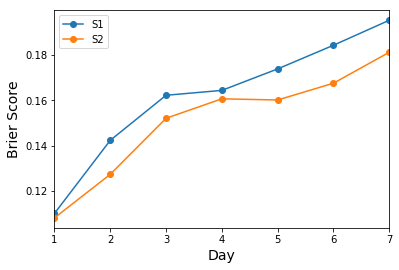

In [32]:
obs = np.where(rain_data["OB"] > 0, 1, 0)
days = np.arange(1, 8)
sources = ["S1", "S2"]
daily_brier_scores = pd.DataFrame(index=days, columns=sources, dtype=float)
# Loop through each forecaster and day
for fc in daily_brier_scores.columns:
    for day in days:
        daily_brier_scores.loc[day, fc] = brier_score(rain_data[fc + "D{0:d}".format(day)] / 100,
                                                             obs)
# Plot the Brier Scores by Day
daily_brier_scores.plot(marker='o')
plt.xlabel("Day", fontsize=14)
plt.ylabel("Brier Score", fontsize=14)

While the Brier Score can provide information about which probabilistic forecast is more accurate, it does not state why a particular forecast is better. However, if the probabilities are discretized, then the Brier Score can be decomposed into three components that convey desirable properties of the forecast. The Brier Score decomposition is
$BS=\frac{1}{N}\sum_{k=1}^{K}n_k(p_k-\bar{o}_k)^2-\frac{1}{N}\sum_{k=1}^{K}n_k(\bar{o}_k-\bar{o})^2+\bar{o}(1-\bar{o})$

The first term is the __reliability__. It measures how closely a forecast matches the relative frequency of the event occurring given a particular probability being forecast. 

The second term is the __resolution__. It measures how much the average forecast differs from the climatological or base rate. 

The third term is the __uncertainty__. It is a measure of the difficulty of forecasting an event and is an intrinsic property of the event being observed. Because different forecast samples have different uncertainties, Brier Scores from two different samples of forecasts cannot be directly compared.

In [40]:
def brier_score_components(forecasts, observations, thresholds):
    bs_comps = np.zeros((2, thresholds.size))
    climo = observations.mean()
    for t, threshold in enumerate(thresholds):
        if t == thresholds.size - 1:
            max_thresh = 1.1
        else:
            max_thresh = thresholds[t + 1]
        t_indices = np.where((forecasts >= threshold) & (forecasts < max_thresh))[0]
        if t_indices.size > 0:
            bs_comps[0, t] = t_indices.size * (threshold - observations[t_indices].mean()) ** 2
            bs_comps[1, t] = t_indices.size * (observations[t_indices].mean() - climo) ** 2
    reliability = bs_comps[0].mean()
    resolution = bs_comps[1].mean()
    uncertainty = climo * (1 - climo)
    return np.array([reliability, resolution, uncertainty])

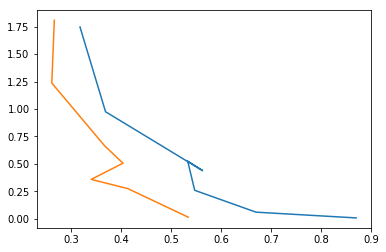

In [44]:
comp_cols = ["REL", "RES", "UNC"]
all_cols = []
for s in sources:
    for comp in comp_cols:
        all_cols.append(s + "_" + comp)
daily_brier_score_comps = pd.DataFrame(index=days, columns=all_cols, dtype=float)
thresholds = np.arange(0, 1.1, 0.1)
# Loop through each forecaster and day
for s in sources:
    s_cols = [s + "_" + comp for comp in comp_cols]
    for day in days:
        daily_brier_score_comps.loc[day, s_cols] = brier_score_components(rain_data[s + "D{0:d}".format(day)] / 100,
                                                             obs, thresholds)
    plt.plot(daily_brier_score_comps[s + "_REL"], daily_brier_score_comps[s + "_RES"])